## Outline
  - String Functions in Pandas
  - DateTime handling using pandas
  - **Uses/necessity of matplotlib**
  - DMart Use Case
  - **Anatomy**
    - Elements
    - Axes
    - Figure
  - Types of Data visualization



### Importing our data

Let's load our Pfizer data

Link: https://drive.google.com/file/d/173A59xh2mnpmljCCB9bhC4C5eP2IS6qZ/view?usp=sharing

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!gdown 173A59xh2mnpmljCCB9bhC4C5eP2IS6qZ

Downloading...
From: https://drive.google.com/uc?id=173A59xh2mnpmljCCB9bhC4C5eP2IS6qZ
To: /content/Pfizer_1.csv
100% 1.51k/1.51k [00:00<00:00, 1.51MB/s]


In [ ]:
data = pd.read_csv('Pfizer_1.csv')

We will restructure our data as we did in the lecture

In [ ]:
data_melt = pd.melt(data,id_vars = ['Date', 'Drug_Name', 'Parameter'], 
            var_name = "time",      
            value_name = 'reading')  
data_tidy = data_melt.pivot(index=['Date','time', 'Drug_Name'], 
                                        columns = 'Parameter',  
                                        values='reading') 
data_tidy = data_tidy.reset_index()
data_tidy.columns.name = 'None'
data_tidy.head()

None,Date,time,Drug_Name,Pressure,Temperature
0,15-10-2020,10:30:00,diltiazem hydrochloride,18.0,20.0
1,15-10-2020,10:30:00,docetaxel injection,26.0,23.0
2,15-10-2020,10:30:00,ketamine hydrochloride,9.0,22.0
3,15-10-2020,11:30:00,diltiazem hydrochloride,19.0,20.0
4,15-10-2020,11:30:00,docetaxel injection,29.0,25.0


### String functions


 

#### What kind of questions can we use string methods for?

Find rows which contains a particular string

Say,

####How you can you filter rows containing "hydrochloric" in their drug name?


In [ ]:
data_tidy.loc[data_tidy['Drug_Name'].str.contains('hydrochloride')].head()

None,Date,time,Drug_Name,Pressure,Temperature
0,15-10-2020,10:30:00,diltiazem hydrochloride,18.0,20.0
2,15-10-2020,10:30:00,ketamine hydrochloride,9.0,22.0
3,15-10-2020,11:30:00,diltiazem hydrochloride,19.0,20.0
5,15-10-2020,11:30:00,ketamine hydrochloride,9.0,21.0
6,15-10-2020,12:30:00,diltiazem hydrochloride,20.0,21.0



So in general, we will be using the following format:

     > Series.str.function()

Series.str can be used to **access the values of the series as strings** and apply several methods to it.


Now suppose we want to form a new column based on the year of the experiments?

#### What can we do form a column containing the year?


In [ ]:
data_tidy['Date'].str.split('-')

0      [15, 10, 2020]
1      [15, 10, 2020]
2      [15, 10, 2020]
3      [15, 10, 2020]
4      [15, 10, 2020]
            ...      
103    [17, 10, 2020]
104    [17, 10, 2020]
105    [17, 10, 2020]
106    [17, 10, 2020]
107    [17, 10, 2020]
Name: Date, Length: 108, dtype: object

To extract the year we need to select the last element of each list

In [ ]:
data_tidy['Date'].str.split('-').apply(lambda x:x[2])

0      2020
1      2020
2      2020
3      2020
4      2020
       ... 
103    2020
104    2020
105    2020
106    2020
107    2020
Name: Date, Length: 108, dtype: object

But there are certain problems with this approach:

- The **dtype of the output is still an object**, we would prefer a number type
- The date format will always **not be in day-month-year**, it can vary 

Thus, to work with such date-time type of data, we can use a special method of pandas

### Datetime

Lets start with understanding a date-time type of data

#### How can we handle handle date-time data-types?

  - We can do using the `to_datetime()` function of pandas
  - It takes as input:
    - Array/Scalars with values having proper date/time format
    - `dayfirst`: Indicating if the day comes first in the date format used
    - `yearfirst`: Indicates if year comes first in the date format

Let's first merge our ```Date``` and ```time``` columns into a new timestamp column




In [ ]:
data_tidy['timestamp'] = data_tidy['Date']+ " "+ data_tidy['time']

In [ ]:
data_tidy.drop(['Date', 'time'], axis=1, inplace=True)

In [ ]:
data_tidy.head()

None,Drug_Name,Pressure,Temperature,timestamp
0,diltiazem hydrochloride,18.0,20.0,15-10-2020 10:30:00
1,docetaxel injection,26.0,23.0,15-10-2020 10:30:00
2,ketamine hydrochloride,9.0,22.0,15-10-2020 10:30:00
3,diltiazem hydrochloride,19.0,20.0,15-10-2020 11:30:00
4,docetaxel injection,29.0,25.0,15-10-2020 11:30:00


Lets convert our `timestamp` col now

In [ ]:
data_tidy['timestamp'] = pd.to_datetime(data_tidy['timestamp']) # will leave to explore how you can mention datetime format by your own

data_tidy

None,Drug_Name,Pressure,Temperature,timestamp
0,diltiazem hydrochloride,18.0,20.0,2020-10-15 10:30:00
1,docetaxel injection,26.0,23.0,2020-10-15 10:30:00
2,ketamine hydrochloride,9.0,22.0,2020-10-15 10:30:00
3,diltiazem hydrochloride,19.0,20.0,2020-10-15 11:30:00
4,docetaxel injection,29.0,25.0,2020-10-15 11:30:00
...,...,...,...,...
103,docetaxel injection,26.0,19.0,2020-10-17 08:30:00
104,ketamine hydrochloride,11.0,20.0,2020-10-17 08:30:00
105,diltiazem hydrochloride,9.0,13.0,2020-10-17 09:30:00
106,docetaxel injection,27.0,20.0,2020-10-17 09:30:00


In [ ]:
data_tidy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Drug_Name    108 non-null    object        
 1   Pressure     95 non-null     float64       
 2   Temperature  95 non-null     float64       
 3   timestamp    108 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 3.5+ KB


The **type of `timestamp` column** has been **changed to `datetime`** from `object`

Now, Let's look at a single timestamp using Pandas

#### How can we **extract information** from a single **timestamp** using Pandas?

In [ ]:
ts = data_tidy['timestamp'][0]
ts

Timestamp('2020-10-15 10:30:00')

#### Now how can we extract the year from this date ?


In [ ]:
ts.year

2020

Similarly we can also access the month and day using the `month` and `day` attributes

In [ ]:
ts.month

10

In [ ]:
ts.day

15

#### But what if we want to know the name of the month or the day of the week on that date ?
  - We can find it using `month_name()` and `day_name()` methods

In [ ]:
ts.month_name()

'October'

In [ ]:
ts.day_name()

'Thursday'

In [ ]:
ts.dayofweek

3

In [ ]:
ts.hour

10

In [ ]:
ts.minute

30

... and so on

We can similarly extract minutes and seconds


#### This data parsing from string to date-time makes it easier to work with data

We can use this data from the columns as a whole using ```.dt``` object

In [ ]:
data_tidy['timestamp'].dt

- **`dt` gives properties of values in a column**

- From this **`DatetimeProperties` of column `'end'`**, we can **extract `year`**

In [ ]:
data_tidy['timestamp'].dt.year

0      2020
1      2020
2      2020
3      2020
4      2020
       ... 
103    2020
104    2020
105    2020
106    2020
107    2020
Name: timestamp, Length: 108, dtype: int64

Now, Let's **create the new column using these extracted values from the property**

We will use strfttime, short for stringformat time, to modify our datetime format

Let's learn this with the help of few examples

In [ ]:
data_tidy['timestamp'][0]

Timestamp('2020-10-15 10:30:00')

In [ ]:
print(data_tidy['timestamp'][0].strftime('%Y')) # Formatter for year

2020


In [ ]:
print(data_tidy['timestamp'][0].strftime('%m')) # Formatter for month

10


In [ ]:
print(data_tidy['timestamp'][0].strftime('%d')) # Formatter for day

15


In [ ]:
print(data_tidy['timestamp'][0].strftime('%H')) # Formatter for hour

10


In [ ]:
print(data_tidy['timestamp'][0].strftime('%M')) # Formatter for minutes

30


In [ ]:
print(data_tidy['timestamp'][0].strftime('%S')) # Formatter for seconds

00


Similarly we can combine the format types to modify the date-time format as per our convinience

In [ ]:
data_tidy['timestamp'][0].strftime('%m-%d')

'10-15'

### Writing to file


#### How can we write our dataframe to a csv file?


- We have to **provide the path and file_name** in which you want to store the data

In [ ]:
data_tidy.to_csv('pfizer_tidy.csv', sep=",") 

## Data Visualization Agenda

#### Where is all Data Visualization helpful? Why?

- Exploratory - EDA
- Explanatory - Storytelling

#### What is the Science in Data Visualization?
- Anatomy of a plot/chart
- Asking the right questions before creating a plot
- How to use the right plot/chart for given data?

#### What is the Art in Data Visualization?
- Choose the right scale, labels, tick labels
- Identify and remove clutters in the plot
- Choose the right font size
- Ways to highlight information in the plot




#### Installing and importing matplotlib

In [ ]:
# %pip install matplotlib


We don't need to import the entire library but just its submodule `pyplot`
  
We'll use the **alias name `plt`**

#### What is `pyplot`?  
  - `pyplot` is a **module for visualization** inside `matplotlib` library
    
#### Why should we use `pyplot` though?

Pyplot is the 2D plotting library of matplotlib

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Now, why do we need to visualize data?

  <!-- - It helps us to understand the data in a **pictorial format**

  - It's **extensively used in Exploratory Data Analysis**

  - And also to **present peformance results of our models** -->
Mainly 
- **Exploratory**  - I can’t see certain patterns just by crunching numbers (avg, rates, %ages)
- Explanatory -  I can show numbers, but I’d like a visual art for storytelling

***


Let’s talk about Science first, but before we start, let’s refresh some terminologies 

#### Data
- Rows: Samples, Data-points, Records
- Columns: Features, Variables

#### How many kinds of data do we have?

At the fundamental level, it's just two types:
- Numerical/Continous 
- Categorical

Categorical can be further divided into:
  - **Ordinal:** Categorical Data with an order (E.g. low, medium, high)
  - **Non-ordinal/nominal:** Categorical Data without any order (example gender as Male/Female)

<!-- So we can start by visualizing this data, one at a time -->

<!-- #### What is analyzing a single feature/column is called?

**Univariate Analysis** -->


## DMart UseCase

Let's look at our business case for today

Suppose you are a data-scientist at a retail giant, say **DMart**

Your task is to understand the **past trends and distributions** of the company's product's performance.

Let's load our data and look into it

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/019/202/original/bigmart_data.csv?1667195698 -O bigmart.csv

--2022-11-11 13:44:28--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/019/202/original/bigmart_data.csv?1667195698
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.164.115.123, 18.164.115.154, 18.164.115.106, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.164.115.123|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 869537 (849K) [text/plain]
Saving to: ‘bigmart.csv’

bigmart.csv         100%[===================>] 849.16K  --.-KB/s    in 0.03s   

2022-11-11 13:44:28 (23.8 MB/s) - ‘bigmart.csv’ saved [869537/869537]



In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('bigmart.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


If you notice, 

- Columns like `Item Weight`, `Item Visibility` are continous
- While columns like `Item Fat Content`, `Item Type` are categorical

On noticing further,
- `Item_Type` is of nominal type, no proper order between the categories
- `Outlet_Size` is of ordinal type, there's a order to the categories

#### How can we be sure of which features are categorical and continous?

In [ ]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
data.describe(include=object)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


The categorical string columns were omitted from `data.describe()`

Now, that we have unbderstood the Business case, lets learn Matplotlib a bit

### Introduction to Matplotlib

#### Lets learn to create a basic plot using plt

Now say, we want to draw a curve passing through 3 points:
  - (0, 3)
  - (1, 5)
  - (2, 9)

#### How can we draw a curve using matplotlib ?

By using `plt.plot() function`

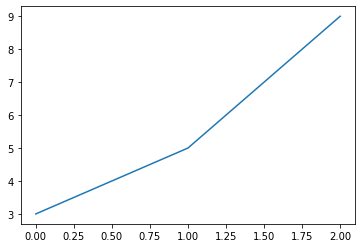

In [ ]:
x_val = [0, 1, 2]
y_val = [3, 5, 9]
plt.plot(x_val, y_val)

#### What can we observe from this plot ?
  
  - `plt.plot()` automatically decided the scale of the plot
  
  - It also prints the **type of object** `matplotlib.lines.Line2D`

While this command decided a lot of things for you, you can customise each of these by understanding **components of a matplotlib plot**




## Anatomy of Matplotlib

<!-- <img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/019/567/original/image_2022-11-10_121820129.png?1668062911"> -->


<!-- <img src="https://files.realpython.com/media/fig_map.bc8c7cabd823.png" />
<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/019/579/original/image_2022-11-10_150131378.png?1668072693"> -->

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/019/615/original/image_2022-11-11_112008033.png?1668145811">

Woah! There is a lot of information in this image. Let's understand them one at a time.


- Figure: The **overall window** or page that everything is drawn on.
  - You can create multiple independent Figures.
  - To the figure you can add multiple **Axes** 
- **Axis**: Simply the `x-axis` and `y-axis`
- **Axes**: - It is the **area** on which the **data is plotted** with functions such as `plot()`
- **x-label**: Name of x-axis
- **y-label**: Name of y-axis 
- **Title**: Title of each plot **(Axes)**, giving information about the same
- **Major ticks**: subdivides the axis into major units. They appear by default during plotting
- **Minor ticks**: subdivides the major tick units. They are by default hidden and can be toggled on.
- **Legend**: describes the elements in the plot, blue and green curves in this case
- **Suptitle**: The common title of all the plots




These are the major components of a matplotlib plot

#### Now, how to choose the right plot?

Firstly, depends on the what is your question of interest

When the question is clear, ask the right 
- How many variables are involved?
- Whether the variable(s) are numerical or categorical?

#### How many variables are involved?

- 1 Variable      - Univariate Analysis
- 2 Variables    - Bivariate Analysis
- 2+ Variables  - Multivariate Analysis
     
PS: Bivariate counts under multivariate, but let's keep it sep for ease of communication

What are the possible cases?

#### Univariate 
- Numerical
- Categorical

#### Bivariate
- Numerical-Numerical
- Numerical-Categorical
- Categorical-Categorical

#### Multivariate
	 
Let’s start with 3 and then we can generalize

- Numerical-Numerical-Categorical
- Categorical-Categorical-Numerical
- Categorical-Categorical-Categorical
- Numerical-Numerical-Numerical


We will work on these one by one 